<a href="https://colab.research.google.com/github/unburied/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/LS_DS_224_Sequence_your_narrative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Sequence your narrative

Today we will create a sequence of visualizations inspired by [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://www.youtube.com/watch?v=jbkSRLYSojo).

Using this [data from Gapminder](https://github.com/open-numbers/ddf--gapminder--systema_globalis/):
- [Income Per Person (GDP Per Capital, Inflation Adjusted) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv)
- [Life Expectancy (in Years) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv)
- [Population Totals, by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Entities](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv)
- [Concepts](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv)

Objectives
- sequence multiple visualizations
- combine qualitative anecdotes with quantitative aggregates

Links
- [Hans Rosling’s TED talks](https://www.ted.com/speakers/hans_rosling)
- [Spiralling global temperatures from 1850-2016](https://twitter.com/ed_hawkins/status/729753441459945474)
- "[The Pudding](https://pudding.cool/) explains ideas debated in culture with visual essays."
- [A Data Point Walks Into a Bar](https://lisacharlotterost.github.io/2016/12/27/datapoint-in-bar/): a thoughtful blog post about emotion and empathy in data storytelling

## Make a plan

#### How to present the data?

Variables --> Visual Encodings
- Income --> x
- Lifespan --> y
- Region --> color
- Population --> size
- Year --> animation frame (alternative: small multiple)
- Country --> annotation

Qualitative --> Verbal
- Editorial / contextual explanation --> audio narration (alternative: text)


#### How to structure the data?

| Year | Country | Region   | Income | Lifespan | Population |
|------|---------|----------|--------|----------|------------|
| 1818 | USA     | Americas | ###    | ##       | #          |
| 1918 | USA     | Americas | ####   | ###      | ##         |
| 2018 | USA     | Americas | #####  | ###      | ###        |
| 1818 | China   | Asia     | #      | #        | #          |
| 1918 | China   | Asia     | ##     | ##       | ###        |
| 2018 | China   | Asia     | ###    | ###      | #####      |


## Upgrade Seaborn

Make sure you have at least version 0.9.0.

In Colab, go to **Restart runtime** after you run the `pip` command.

In [0]:
!pip install --upgrade seaborn

In [0]:
import seaborn as sns
sns.__version__

## More imports

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Load & look at data

In [0]:
income = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')

In [0]:
lifespan = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')

In [0]:
population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

In [0]:
entities = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')

In [0]:
concepts = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv')

In [0]:
income.shape, lifespan.shape, population.shape, entities.shape, concepts.shape

In [0]:
income.head()

In [0]:
lifespan.head()

In [0]:
population.head()

In [0]:
pd.options.display.max_columns = 500
entities.head()

In [0]:
concepts.head()

## Merge data

https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf

In [0]:
df = income.merge(population.merge(lifespan))
df.head()

In [0]:
df = pd.merge(df, entities[['country','name', 'world_6region']], 
              left_on = 'geo', right_on ='country')

In [0]:
df.sample()

In [0]:
df.drop(columns = ['geo','country'], inplace = True)
df.head()

In [0]:
 headers = {
    'time': 'year', 
    'income_per_person_gdppercapita_ppp_inflation_adjusted': 'income', 
    'life_expectancy_years': 'lifespan', 
    'population_total': 'population', 
    'name': 'country', 
    'world_6region': 'region'
}
df = df.rename(columns = headers) 

In [26]:
df.head()

,year,income,population,lifespan,country,region
0,1800,603,3280000,28.21,Afghanistan,south_asia
1,1801,603,3280000,28.20,Afghanistan,south_asia
2,1802,603,3280000,28.19,Afghanistan,south_asia
3,1803,603,3280000,28.18,Afghanistan,south_asia
4,1804,603,3280000,28.17,Afghanistan,south_asia


## Explore data

In [0]:
df.describe()

In [0]:
countries = df['country'].value_counts().to_dict()
countries = list(countries.keys())
countries


In [0]:
##takes a feature from df and returns a list containing the difference of
##min max for each feature based on country
def growth(feature):  
  life_growth = []
  pop_growth = []
  income_growth = []

  for country in countries:
    subset = df[df['country'] == country]

    growth = subset.lifespan.max() - subset.lifespan.min()
    life_growth.append(growth)

    growth = subset.population.max() - subset.population.min()
    pop_growth.append(growth)

    growth = subset.income.max() - subset.income.min()
    income_growth.append(growth)

  zip_life = sorted(list(zip(countries, life_growth)),
                    key = lambda v: v[1], reverse = True)
  zip_pop = sorted(list(zip(countries, pop_growth)),
                   key = lambda v: v[1], reverse = True)
  zip_inc = sorted(list(zip(countries, income_growth)),
                   key = lambda v: v[1], reverse = True)


  if feature == 'lifespan':
    return zip_life
  elif feature == 'population':
    return zip_pop
  elif feature == 'income':
    return zip_inc
  else:
    return 'failed'
  

In [72]:
growth('income')[:10]

[('United Arab Emirates', 176524),
 ('Qatar', 160111),
 ('Brunei', 144543),
 ('Kuwait', 112726),
 ('Saudi Arabia', 101782),
 ('Luxembourg', 97581),
 ('Singapore', 82867),
 ('Libya', 64780),
 ('Ireland', 64229),
 ('Norway', 63795)]

In [44]:
growth('population')[:10]

[('India', 1185476959),
 ('China', 1093370915),
 ('United States', 319964894),
 ('Indonesia', 250686435),
 ('Brazil', 207228318),
 ('Pakistan', 187690185),
 ('Nigeria', 183774382),
 ('Bangladesh', 147140791),
 ('Mexico', 124577366),
 ('Russia', 117342975)]

In [54]:
growth('lifespan')[:10]

[('Tunisia', 76.46),
 ('Finland', 73.95),
 ('Turkey', 72.32),
 ('Samoa', 71.28999999999999),
 ('Mauritius', 70.89),
 ('Maldives', 70.06),
 ('Kazakhstan', 67.91),
 ('Ireland', 67.39),
 ('Algeria', 66.86),
 ('Serbia', 66.11)]

## Plot visualization

In [74]:
lifespan = pd.DataFrame(growth('lifespan'), columns = ['countries', 'lifespan'])
lifespan.head()

,countries,lifespan
0,Tunisia,76.46
1,Finland,73.95
2,Turkey,72.32
3,Samoa,71.29
4,Mauritius,70.89


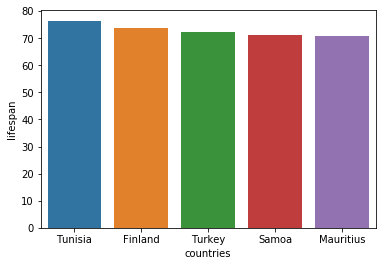

In [77]:
sns.barplot(x='countries', y='lifespan', data = lifespan[:5])

## Analyze outliers

## Plot multiple years

## Point out a story

# ASSIGNMENT
Replicate the lesson code

# STRETCH OPTIONS

## 1. Animate!
- [Making animations work in Google Colaboratory](https://medium.com/lambda-school-machine-learning/making-animations-work-in-google-colaboratory-new-home-for-ml-prototyping-c6147186ae75)
- [How to Create Animated Graphs in Python](https://towardsdatascience.com/how-to-create-animated-graphs-in-python-bb619cc2dec1)
- [The Ultimate Day of Chicago Bikeshare](https://chrisluedtke.github.io/divvy-data.html) (Lambda School Data Science student)

## 2. Work on anything related to your portfolio site / project